# Assignment – 1 
# Predictive Modelling of Eating-Out Problem
##### 14 August 2024 Meizhi Zhao (u3254093)

# Part A –Importing and Understanding Data

## 1- Provide plots/graphs to support: 

### 1-1 How many unique cuisines are served by Sydney restaurants? 

In [1]:

# import libraries
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# upload data
data = pd.read_csv('data/zomato_df_final_data.csv')
print(data.head())

                                             address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmo

There are 134 cuisines served by the Sydney restaurants.


C:\Users\zhaom\AppData\Local\Temp\ipykernel_33460\4130547846.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')  # Using viridis color palette


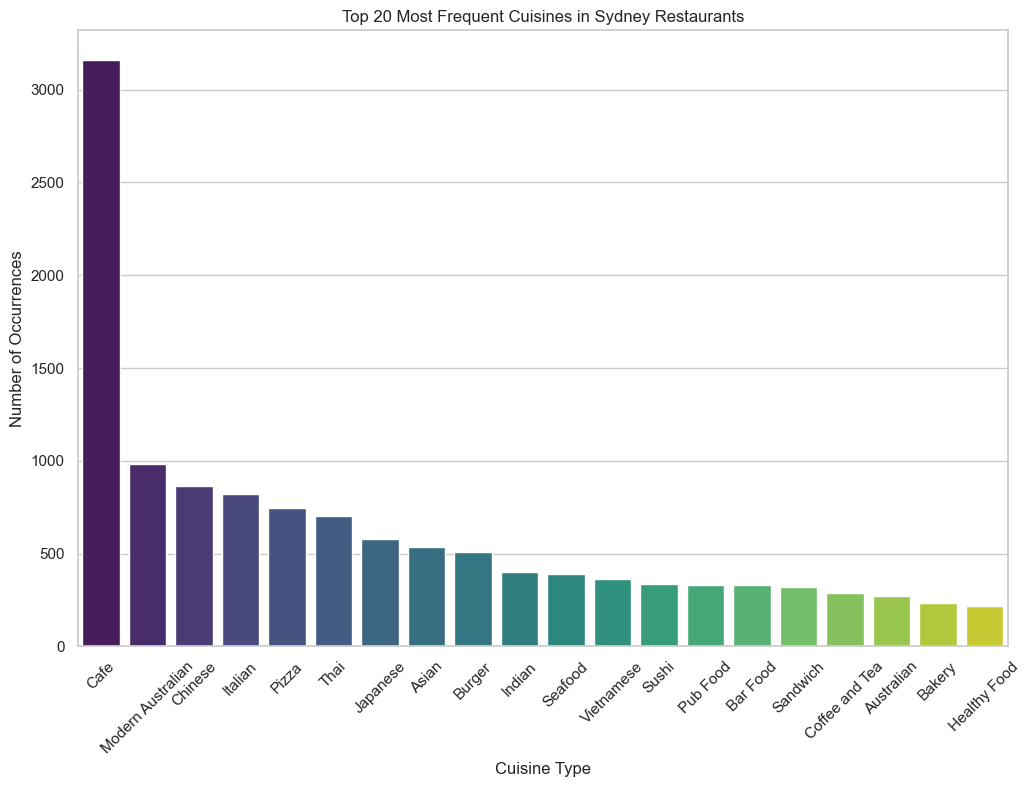

In [3]:

# check for the unique cuisines are served by the Sydney restaurants

# Extract cuisines into a list of lists
cuisines = data['cuisine'].apply(lambda x: ast.literal_eval(x))

# Flatten the list of lists of cuisines
flattened_cusines = [cuisine for sublist in cuisines for cuisine in sublist]

# Fine unique cuisines using a set
unique_cuisines = set(flattened_cusines) # set() function removes duplicates

print('There are ' + str(len(unique_cuisines)) + ' cuisines served by the Sydney restaurants.')

# Count each cuisine
cuisine_counts = pd.Series(flattened_cusines).value_counts().head(20)

# Seaborn style settings
sns.set(style="whitegrid")  # Set style to whitegrid for more elegant background

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')  # Using viridis color palette
plt.title('Top 20 Most Frequent Cuisines in Sydney Restaurants')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

### 1-2 which suburbs (top 3) have the highest number of restaurants?

Top three most frequent suburbs in which the restaurants are located are: 
subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


C:\Users\zhaom\AppData\Local\Temp\ipykernel_33460\3964801609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_suburbs.index, y=top_3_suburbs.values, palette='coolwarm', width=0.3)  # Use a warm color palette


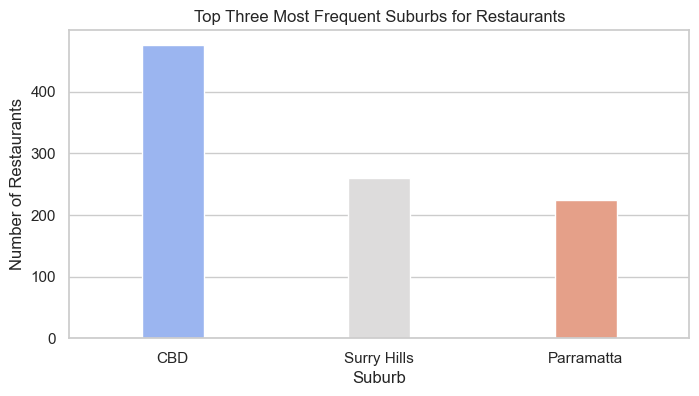

In [4]:
# calculate the top 3 most frequent suburbs in which the restaurants are located
top_3_suburbs = data['subzone'].value_counts().head(3)
print('Top three most frequent suburbs in which the restaurants are located are: \n' + str(top_3_suburbs))

# Plotting with Seaborn
sns.set(style="whitegrid")  # Set style to whitegrid for more elegant background
plt.figure(figsize=(8, 4))  # Set the figure size for better readability
sns.barplot(x=top_3_suburbs.index, y=top_3_suburbs.values, palette='coolwarm', width=0.3)  # Use a warm color palette
plt.title('Top Three Most Frequent Suburbs for Restaurants')
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)  # Rotate labels for better visibility
plt.show()

### 1-3 “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not? Please support your answer with numbers and visuals. (hint: use stacked bar chart or histogram to relate ‘cost’ to 'rating_text') 

Statistical Summary of Prices for Restaurants Rated as 'Excellent' and 'Poor': 

        Excellent        Poor
count  51.000000  201.000000
mean    9.234417    5.695405
std     8.744258    1.833485
min     2.926829    2.926829
25%     4.471545    4.471545
50%     6.016260    5.243902
75%    10.650407    6.788618
max    40.000000   15.284553


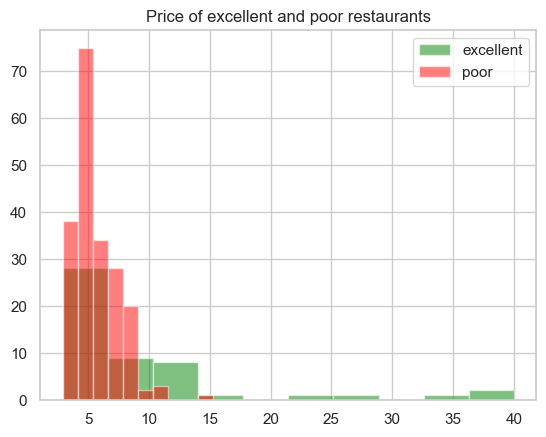

In [5]:
# Filter the restaurants based on their ratings
excellent_restaurants = data[data['rating_text'] == 'Excellent']
poor_restaurants = data[data['rating_text'] == 'Poor']

# Calculate the average price of the excellent and poor restaurants
price_excellent = excellent_restaurants['cost_2']
price_poor = poor_restaurants['cost_2']

# Display the summary statistics of the price of excellent and poor restaurants
excellent_cost_desc = excellent_restaurants['cost_2'].describe()
poor_cost_desc = poor_restaurants['cost_2'].describe()

# Concatenate the two series into a data frame
comparison_df = pd.concat([excellent_cost_desc, poor_cost_desc], axis=1)
comparison_df.columns = ['Excellent', 'Poor']

# Print the comparison
print("Statistical Summary of Prices for Restaurants Rated as 'Excellent' and 'Poor': \n\n", comparison_df)

# Plot the histograms
plt.hist(price_excellent, bins = 10, alpha=0.5, label='excellent', color='green')
plt.hist(price_poor, bins = 10, alpha=0.5, label='poor', color = 'red')
plt.title('Price of excellent and poor restaurants')
plt.legend(loc='upper right')
plt.show()

#### Insights: Based on the data, the average price for "Excellent" rated restaurants is 9.23, higher than the 5.69 for "Poor" rated ones. The maximum price for "Excellent" restaurants reaches 40, while "Poor" restaurants max out at 15.28. The histogram shows that "Poor" rated restaurants cluster around lower prices (4-8), while "Excellent" rated ones have a wider distribution, with prices between 5-10 and some reaching 40. Therefore, I agree that "Excellent" rated restaurants tend to be more expensive, while "Poor" rated restaurants are generally less costly.

## 2- Perform exploratory analysis for the variables of the data. 
##### This can be done by producing histograms, distribution plots, and descriptive insights about these variables. This can be performed at least for the following variables. 
##### o Cost 
##### o Rating 
##### o Type  

### Exploratory data analysis

In [6]:
# data shape
print(data.shape)
# data information
print(data.info())

(10500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
mem

#### 2-1 Exploratory analysis for the variable cost

In [7]:
# take a look at the data
data['cost'].describe()

count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64

In [8]:
# Check for the missing values
print("Total missing 'cost' values:", data['cost'].isnull().sum())
percentage_missing = 100 * data['cost'].isnull().sum() / len(data)
print(f"Percentage of missing 'cost' values: {percentage_missing:.2f}%")

Total missing 'cost' values: 346
Percentage of missing 'cost' values: 3.30%


In [9]:
# Dealing with missing values
cost_without_missing = data['cost'].dropna()
# check for the data
cost_without_missing.shape

(10154,)

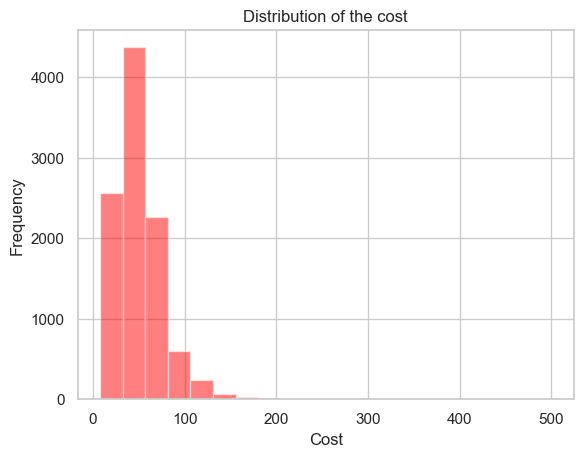

In [10]:
# Display the distribution of the cost
plt.hist(cost_without_missing, bins = 20, color='red', alpha=0.5)
plt.title('Distribution of the cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x16c8e9be8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c8e9beae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c8e9bd130>],
 'medians': [<matplotlib.lines.Line2D at 0x16c8e9bf500>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c8e9bc3b0>],
 'means': []}

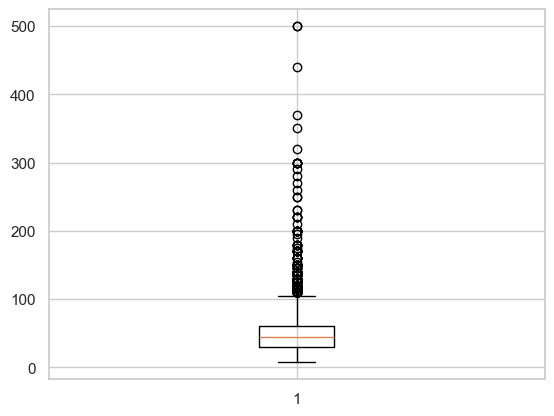

In [11]:
# Let's check the outliers with a box plot
plt.boxplot(cost_without_missing)

##### Descriptive Insights for variable Cost: Most Sydney restaurants have moderate prices, with a few high-end options. The cost distribution shows affordable dining is common, though there are some expensive outliers.

#### 2-2 Exploratory analysis for the variable rating

In [12]:
# let's take a look at the data
data['rating_number'].describe()

count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64

In [13]:
# Check for the missing values
print("Total missing 'rating_number' values:", data['rating_number'].isnull().sum())
percentage_missing = 100 * data['rating_number'].isnull().sum() / data['rating_number'].shape[0]
print(f"Percentage of missing 'cost' values: {percentage_missing:.2f}%")

Total missing 'rating_number' values: 3316
Percentage of missing 'cost' values: 31.58%


In [14]:
# Dealing with missing values
rating_without_missing = data['rating_number'].dropna()
# check for the data
rating_without_missing.shape

(7184,)

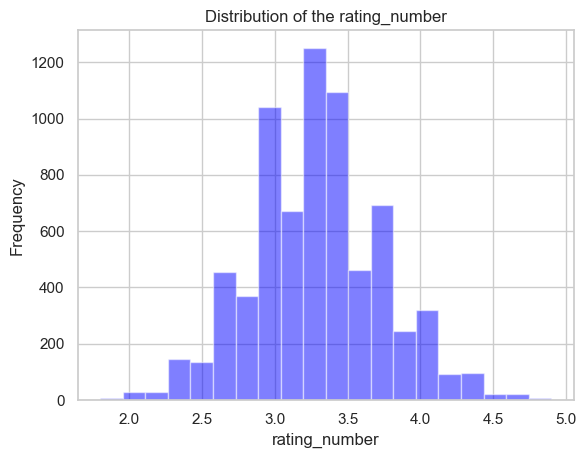

In [15]:
# Display the distribution of the rating_number
plt.hist(rating_without_missing, bins = 20, color='blue', alpha=0.5)
plt.title('Distribution of the rating_number')
plt.xlabel('rating_number')
plt.ylabel('Frequency')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x16c8e6b0860>,
 'caps': [<matplotlib.lines.Line2D at 0x16c8e6b37d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c8e6b2d20>],
 'medians': [<matplotlib.lines.Line2D at 0x16c8e6b3f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c8e6b3c20>],
 'means': []}

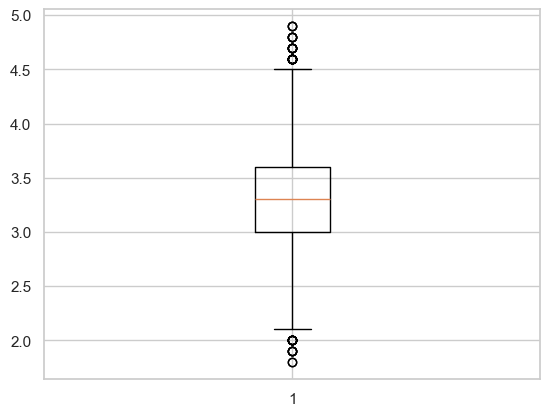

In [16]:
# Let's check the outliers with a box plot
plt.boxplot(rating_without_missing)

##### Descriptive Insights for variable rating_number: Restaurant ratings are mostly average to high, indicating good customer satisfaction. Very few restaurants have poor ratings, with more positive feedback overall.

#### 2-3 Exploratory analysis for the variable type

In [17]:
# let's take a look at the data
data['type'].describe()
type(data['type'][0])

str

In [18]:
# Check for the missing values
print("Total missing 'rating_number' values:", data['type'].isnull().sum())
percentage_missing = 100 * data['type'].isnull().sum() / data['type'].shape[0]
print(f"Percentage of missing 'cost' values: {percentage_missing:.2f}%")

Total missing 'rating_number' values: 48
Percentage of missing 'cost' values: 0.46%


In [19]:
# Dealing with missing values
type_without_missing = data['type'].dropna()
# check for the data
type_without_missing.shape

(10452,)

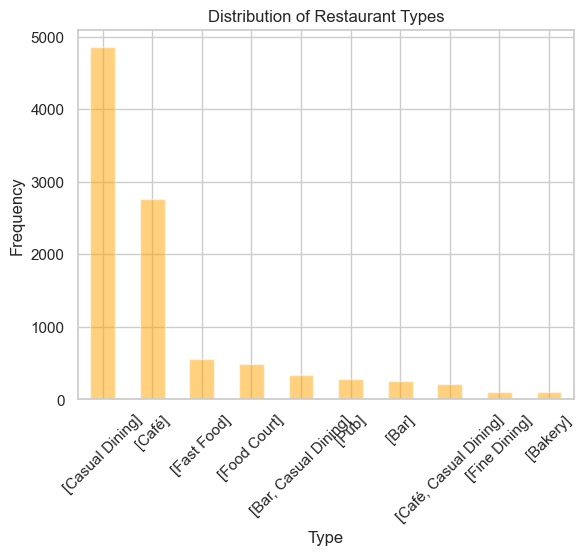

In [20]:
# Display the distribution of the rating_number

# Convert the 'type' column to lists using ast.literal_eval after handling NaN values
data['type'] = data['type'].fillna('[]').apply(lambda x: ast.literal_eval(x)) # Convert string to list

# Sort each list in the 'type' column alphabetically
data['type'] = data['type'].apply(lambda x: sorted(x))

# Count the frequency of each type with the top 10 types
type_counts = data['type'].value_counts().head(10)

# Plotting the bar chart
type_counts.plot(kind='bar', color='orange', alpha=0.5)
plt.title('Distribution of Restaurant Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

##### Descriptive Insights for variable Type: Casual Dining and Cafés are the most common restaurant types in Sydney. There are fewer bars and pubs, reflecting the city’s strong café and casual dining culture.

## 3- Produce Cuisine Density Map
##### Using the restaurant geographic information and the provided “sydney.geojson” file, write a Python function to show a cuisine density map in which each suburb is colour-coded by the number of restaurants that serve a particular cuisine. 
##### (Hint: use the spatial join in geopandas) 

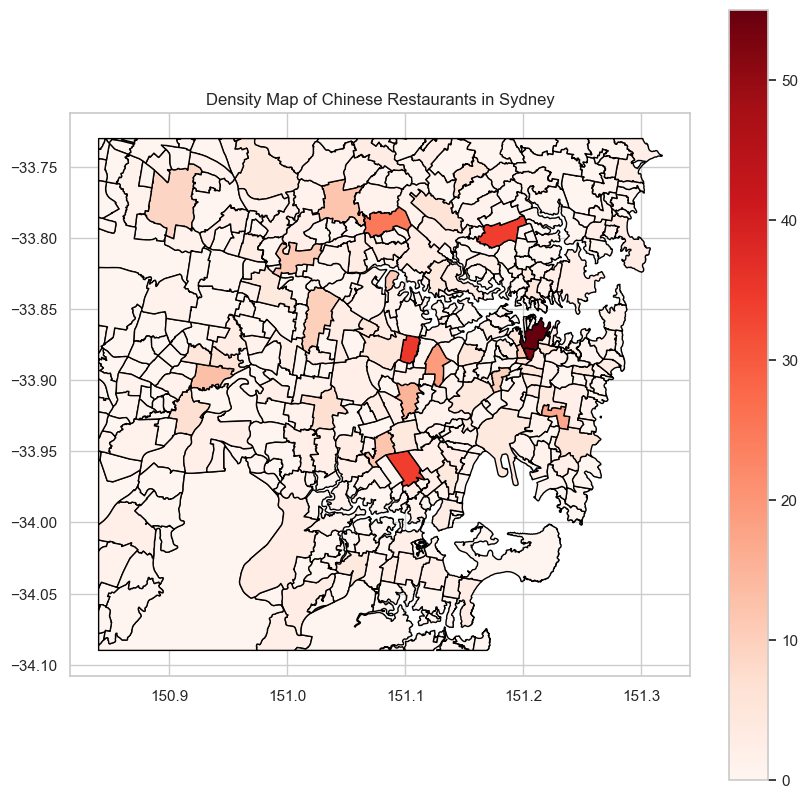

In [21]:
# Load the geographic data for Sydney suburbs
sydney_map = gpd.read_file('data/sydney.geojson')

# Convert the restaurant data into a GeoDataFrame (needed for spatial operations)
restaurant_geo = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data['lng'], data['lat']),
    crs="EPSG:4326"  # Assuming latitude and longitude are in WGS84 format
)

# Perform a spatial join between the restaurant data and the Sydney suburbs map
restaurant_with_suburbs = gpd.sjoin(restaurant_geo, sydney_map, how='left', predicate='intersects')

# Select a cuisine to analyze
cuisine_filter = "Chinese"
restaurant_cuisine = restaurant_with_suburbs[restaurant_with_suburbs['cuisine'].str.contains(cuisine_filter, na=False)]

# Group by suburb and count the number of restaurants serving the chosen cuisine
cuisine_count_by_suburb = restaurant_cuisine.groupby('SSC_NAME').size().reset_index(name='restaurant_count')

# Merge the counts back into the geographic data for plotting
sydney_map_with_counts = sydney_map.merge(cuisine_count_by_suburb, left_on='SSC_NAME', right_on='SSC_NAME', how='left')

# Fill missing values with 0 (i.e., suburbs with no restaurants of the selected cuisine)
sydney_map_with_counts['restaurant_count'] = sydney_map_with_counts['restaurant_count'].fillna(0)

# Plot the map, with color intensity based on the restaurant count
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sydney_map_with_counts.plot(column='restaurant_count', ax=ax, legend=True, cmap='Reds', edgecolor='black')

plt.title(f'Density Map of {cuisine_filter} Restaurants in Sydney')
plt.show()

## 4 Static libraries verses interactive plotting libraries

### 4-1 A concise explanation of using interactive plotting libraries to explore the most popular restaurants in Sydney
#### -- Use Case: Investigate the most popular restaurants in Sydney using factors like cost, cuisine, ratings, and locations.
##### -- Limitations of Non-Interactive Plots:
##### a. Static Display: Only offers a fixed view of data, limiting deeper insights.
##### b. No Drill Down: Users cannot interact with the data to filter or explore specifics dynamically.
##### c. Limited Engagement: Less interaction leads to less engagement with the data.

##### -- Benefits of Interactive Plotting Libraries (e.g., Plotly or Bokeh):
##### a. Dynamic Interaction: Users can use filters, such as sliders for cost or dropdowns for cuisines, to dynamically adjust the data displayed.
##### b. Detailed Information on Demand: Hovering over data points reveals more details, and clicking can provide comprehensive restaurant profiles.
##### c. Enhanced Navigation: Features like zooming and panning help focus on areas of interest like specific subzones in Sydney.

### 4-2 Implementation Example with Plotly

In [22]:

# Replace NaN values in 'cost' with a default value
data1 = data
data1['cost'] = data1['cost'].fillna(data['cost'].mean())

print(data.shape)

# Filter rows where lat or lng might be NaN
data1 = data1.dropna(subset=['lat', 'lng'])

# Now create the scatter map with dynamic elements
fig = px.scatter_mapbox(data1, lat="lat", lon="lng", color="rating_text",
                        size="cost", hover_data=["cuisine", "rating_number"],
                        zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

print(data1.shape)

print("Total missing 'type' values:", data1['type'].isnull().sum())
print("Total missing 'rating_text' values:", data['rating_text'].isnull().sum())
print("Total missing 'cost' values:", data1['cost'].isnull().sum())

(10500, 17)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 5 Tableau Dashboard for quick insights
#### Can you generate a Tableau dashboard that visualises some graphs/plots to answer some of the EDA questions above? Also, can you share this dashboard on the Tableau public? 

In [2685]:
# Display the initial shape of the DataFrame
print(type(data['cuisine'][0]))

# Convert the 'cuisine' column from string to actual Python lists using ast.literal_eval
data['cuisine'] = data['cuisine'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Display the initial shape of the DataFrame
print(type(data['cuisine'][0]))

# Save the cleaned dataset to a CSV for Tableau
data.to_csv('data/zomato_df_final_data_tableau.csv', index=False)

<class 'str'>
<class 'list'>


# share this dashboard on the Tableau public
#### https://public.tableau.com/app/profile/meizhi.zhao/viz/DSTSAssignment1Subzonerestaurantnumberandsubzonedistribution/Subzonerestaurantnumberandratingdistribution?publish=yes

# Part B – Predictive Modelling

## I. Feature Engineering

## 1.Perform data cleaning to remove/impute any useless records in the predictive task (such as NA, NaN, etc.) 

In [2686]:
# summary of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10500 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10500 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

### Explore categorical variables

In [2687]:

# Categorical variables
categorical = [var for var in data.columns if data[var].dtype == 'O']
print("\nThere are {} categorical variables.\n".format(len(categorical)))
print("The categorical variables are :", categorical)


There are 10 categorical variables.

The categorical variables are : ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']


In [2688]:
# check missing variables
print(data[categorical].isnull().sum())
print("********\nPercentages of missing values\n********")
print(100 * data[categorical].isnull().sum() / data.shape[0])

address             0
cuisine             0
link                0
phone               0
rating_text      3316
subzone             0
title               0
type                0
color               0
cuisine_color       0
dtype: int64
********
Percentages of missing values
********
address           0.000000
cuisine           0.000000
link              0.000000
phone             0.000000
rating_text      31.580952
subzone           0.000000
title             0.000000
type              0.000000
color             0.000000
cuisine_color     0.000000
dtype: float64


In [2689]:
# Fill missing values in 'rating_text' with the mode
data['rating_text'].fillna(data['rating_text'].mode()[0], inplace=True)

# Verify missing values are filled
print("\nMissing values after imputation in categorical variables:\n", data[categorical].isnull().sum())


Missing values after imputation in categorical variables:
 address          0
cuisine          0
link             0
phone            0
rating_text      0
subzone          0
title            0
type             0
color            0
cuisine_color    0
dtype: int64


C:\Users\zhaom\AppData\Local\Temp\ipykernel_6244\969557589.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### Explore numerical variables

In [2690]:
# Numerical variables  
numerical = [var for var in data.columns if data[var].dtype != 'O']
print("\nThere are {} numerical variables.\n".format(len(numerical)))
print("The numerical variables are :", numerical)


There are 7 numerical variables.

The numerical variables are : ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']


In [2691]:
# check missing variables
print(data[numerical].isnull().sum())
print("********\nPercentages of missing values\n********")
print(100 * data[numerical].isnull().sum() / data.shape[0])

cost                0
lat               192
lng               192
rating_number    3316
votes            3316
groupon             0
cost_2            346
dtype: int64
********
Percentages of missing values
********
cost              0.000000
lat               1.828571
lng               1.828571
rating_number    31.580952
votes            31.580952
groupon           0.000000
cost_2            3.295238
dtype: float64


In [2692]:
# Calculate the median values for 'rating_number' and 'votes'
median_votes = data['votes'].median()

# Fill missing values in 'rating_number' and 'votes' with the median
data['votes'].fillna(median_votes, inplace=True)

# Drop rows with missing values in 'lat', 'lng', and 'cost_2'
cleaned_data = data.dropna(subset=['lat', 'lng', 'cost_2', 'rating_number'])

# Verify missing values are filled
print("\nMissing values after imputation in numerical variables:\n", cleaned_data[numerical].isnull().sum())


Missing values after imputation in numerical variables:
 cost             0
lat              0
lng              0
rating_number    0
votes            0
groupon          0
cost_2           0
dtype: int64


C:\Users\zhaom\AppData\Local\Temp\ipykernel_6244\3313969105.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## 2. Use proper label/feature encoding for each feature/column you consider, preparing the data for the modelling step. 

##### Data Preprocessing and Encoding

In [2693]:
# 此处待删除
print('cuisine \n', data['cuisine'].head())
print('cuisine \n', type(data['cuisine'][0]), '\n\n5 Tableau Dashboard for quick insights已变成list')

print('\ntype \n', data['type'].head())
print('\ntype: ', type(data['type'][0]), '\n\n2-3 Exploratory analysis for the variable type已变成list')

cuisine 
 0     [Hot Pot, Korean BBQ, BBQ, Korean]
1    [Cafe, Coffee and Tea, Salad, Poké]
2                             [Japanese]
3                    [Modern Australian]
4                          [Thai, Salad]
Name: cuisine, dtype: object
cuisine 
 <class 'list'> 

5 Tableau Dashboard for quick insights已变成list

type 
 0       [Casual Dining]
1                [Café]
2         [Fine Dining]
3    [Bar, Fine Dining]
4       [Casual Dining]
Name: type, dtype: object

type:  <class 'list'> 

2-3 Exploratory analysis for the variable type已变成list


In [2694]:
# print(cleaned_data.shape)

# Drop columns 'lat', 'lng', 'link', 'phone', 'cost_2'
cleaned_data.drop(['address', 'lat', 'lng', 'link', 'phone', 'title', 'cost_2'], axis=1, inplace=True)

# # Combine 'cuisine' and 'type' columns into a single column by concatenating the lists
# data_combined = data['cuisine'] + data['type']

# # Explode the combined lists into individual rows
# data_exploded_combined = data_combined.explode()

# # Get dummy variables (one-hot encoding) for the exploded combined column
# combined_dummies = pd.get_dummies(data_exploded_combined).groupby(level=0).sum()
# # print('cuisine & type head: \n', (combined_dummies.head()))
# print('cuisine & type columns: \n', combined_dummies.shape)
# print('cuisine & type columns: \n', combined_dummies.columns[100:200])


# # Join the dummy DataFrame back to the original DataFrame
# cleaned_data = data.join(combined_dummies)



# Handle 'cuisine' column
cuisine_explode = cleaned_data.explode('cuisine')
cuisine_encoded = pd.get_dummies(cuisine_explode['cuisine'])
cuisine_encoded_final = cuisine_encoded.groupby(cuisine_encoded.index).sum()
cleaned_data = cleaned_data.drop(columns=['cuisine']).join(cuisine_encoded_final)

# # Handle 'type' column
type_exploded = cleaned_data.explode('type')
type_encoded = pd.get_dummies(type_exploded['type'])
type_encoded_final = type_encoded.groupby(type_encoded.index).sum()
cleaned_data = cleaned_data.drop(columns=['type']).join(type_encoded_final, rsuffix='_type')

# Apply Label Encoding to 'rating_text'
label_encoder = LabelEncoder()
cleaned_data['rating_text_encoded'] = label_encoder.fit_transform(cleaned_data['rating_text'])

# One-Hot Encoding for 'subzone', 'type', 'color', and 'cuisine_color' 
cleaned_data = pd.get_dummies(cleaned_data, columns=['subzone', 'color', 'cuisine_color'], drop_first=True)

# Convert 'groupon' column to binary (0/1)
cleaned_data['groupon'] = cleaned_data['groupon'].astype(bool).astype(int)

# Drop the original 'rating_text' column as we now have an encoded version
cleaned_data = cleaned_data.drop(columns=['rating_text'])


print(cleaned_data.shape)
# # Display the updated DataFrame

print(cleaned_data.head())

(6969, 693)
    cost  rating_number   votes  groupon  Afghani  African  American  Arabian  \
0   50.0            4.0  1311.0        0        0        0         0        0   
1   80.0            4.6  3236.0        0        0        0         0        0   
2  120.0            4.9  1227.0        0        0        0         0        0   
3  270.0            4.9   278.0        0        0        0         0        0   
4   55.0            4.5  2150.0        0        0        0         0        0   

   Argentine  Asian  ...  color_#fee0c1  color_#fee5cc  color_#feead5  \
0          0      0  ...          False          False          False   
1          0      0  ...          False          False          False   
2          0      0  ...          False          False          False   
3          0      0  ...          False          False          False   
4          0      0  ...          False          False          False   

   color_#feeddc  color_#fff1e4  color_#fff5eb  cuisine_color_

C:\Users\zhaom\AppData\Local\Temp\ipykernel_6244\2855796494.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2695]:
print(cleaned_data.columns[100:200])

Index(['Salad', 'Sandwich', 'Satay', 'Scandinavian', 'Seafood', 'Shanghai',
       'Sichuan', 'Singaporean', 'Soul Food', 'Spanish', 'Sri Lankan', 'Steak',
       'Street Food', 'Sushi', 'Swedish', 'Swiss', 'Syrian', 'Taiwanese',
       'Tapas', 'Tea', 'Teppanyaki', 'Teriyaki', 'Tex-Mex', 'Thai', 'Tibetan',
       'Turkish', 'Vegan', 'Vegetarian', 'Vietnamese', 'Yum Cha',
       'Bakery_type', 'Bar', 'Beverage Shop', 'Café', 'Casual Dining', 'Club',
       'Dessert Parlour', 'Fast Food_type', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar', 'rating_text_encoded',
       'subzone_Abbotsford', 'subzone_Alexandria',
       'subzone_Amora Hotel Jamison Sydney, CBD', 'subzone_Annandale',
       'subzone_Arncliffe', 'subzone_Art Gallery of New South Wales',
       'subzone_ArtHouse Hotel', 'subzone_Artarmon', 'subzone_Ashfield',
       'subzone_Auburn', 'subzone_Auburn Central, Auburn',
       'subzone_Australia Square Food Court, CBD', 'subzone_Avalon',
       'subzone_B

## II. Regression:

## 3. Build a linear regression model (model_regression_1) to predict the restaurant rating (numeric rating) 
##### from other features (columns) in the dataset. Please consider splitting the data into train (80%) and test (20%) 
##### sets. [Hint: please use sklearn.model_selection.train_test_split  and set random_state=0 “while splitting]

### Declare source and target variables

In [2696]:
# find numerical variables
numericals = [var for var in cleaned_data.columns if cleaned_data[var]. dtype != 'object']
print("There are {} numerical variables\n".format(len(numericals)))
print("The numerical variables are :", numericals)

# Check unique values and their frequency
print('\ncleaned_data value counts: ', cleaned_data['rating_number'].value_counts())

# Split the data into features (X) and target (y)
X = cleaned_data[numericals].drop(['rating_number'], axis=1) 
y = cleaned_data[numericals]['rating_number']

# Check unique values and their frequency
print('\ny value counts: ', y.value_counts())

There are 693 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes', 'groupon', 'Afghani', 'African', 'American', 'Arabian', 'Argentine', 'Asian', 'Australian', 'Austrian', 'BBQ', 'Bakery', 'Bangladeshi', 'Bar Food', 'Belgian', 'Beverages', 'Brasserie', 'Brazilian', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cambodian', 'Cantonese', 'Caribbean', 'Charcoal Chicken', 'Chinese', 'Coffee and Tea', 'Contemporary', 'Continental', 'Creole', 'Crepes', 'Croatian', 'Cuban', 'Deli', 'Desserts', 'Diner', 'Drinks Only', 'Dumplings', 'Eastern European', 'Egyptian', 'Ethiopian', 'European', 'Falafel', 'Fast Food', 'Filipino', 'Finger Food', 'Fish and Chips', 'French', 'Frozen Yogurt', 'Fusion', 'German', 'Greek', 'Grill', 'Hawaiian', 'Healthy Food', 'Hot Pot', 'Hungarian', 'Ice Cream', 'Indian', 'Indonesian', 'International', 'Iranian', 'Iraqi', 'Irish', 'Israeli', 'Italian', 'Japanese', 'Japanese BBQ', 'Juices', 'Kebab', 'Kiwi', 'Korean', 'Korean BBQ', 'Lat


y value counts:  rating_number
3.2    652
3.1    646
3.4    564
3.3    562
3.0    535
3.5    506
2.9    457
3.6    449
3.7    366
2.8    356
3.8    316
2.7    254
3.9    239
4.0    188
2.6    181
2.5    131
4.1    130
4.2     92
2.4     81
2.3     58
4.3     57
4.4     39
2.2     27
4.5     22
2.1     16
4.6     14
2.0      9
4.7      7
4.8      5
1.9      5
4.9      3
1.8      2
Name: count, dtype: int64


### Split data into separate training and test set

In [2697]:

# split X and y into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Check unique values and their frequency
print('\ny_train value counts: ', y_train.value_counts())

(5575, 692) (5575,)
(1394, 692) (1394,)

y_train value counts:  rating_number
3.2    518
3.1    517
3.3    450
3.4    445
3.0    424
3.5    404
2.9    373
3.6    362
3.7    300
2.8    281
3.8    250
2.7    210
3.9    193
4.0    153
2.6    141
2.5    102
4.1    101
4.2     74
2.4     66
2.3     47
4.3     47
4.4     34
2.2     22
4.5     16
2.1     12
4.6     11
2.0      8
4.7      4
4.8      3
4.9      3
1.9      3
1.8      1
Name: count, dtype: int64


In [2698]:
# Apply MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Scaling or standardization

In [2699]:
# first keep the column names to get the DF back
cols = X.columns

scaler = MinMaxScaler() # minMaxScaler to scale the data between 0 and 1

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# get the DFs back
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

,cost,votes,groupon,Afghani,African,American,Arabian,Argentine,Asian,Australian,...,color_#fee0c1,color_#fee5cc,color_#feead5,color_#feeddc,color_#fff1e4,color_#fff5eb,cuisine_color_#6f706b,cuisine_color_#8814b2,cuisine_color_#dee82c,cuisine_color_#f45042
0,0.183673,0.004486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.132653,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.061224,0.006729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.081633,0.024672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.081633,0.001922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2700]:
# Build and train model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)

LinearRegression()

In [2701]:
# Predict and evaluate
y_pred = model_regression_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE for Model 1:', mse)

MSE for Model 1: 2.9227169362357844e-05


## 4. Build another linear regression model (model_regression_2) using the Gradient Descent as the optimisation function. 

In [2702]:
# Build and train model
model_regression_2 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
model_regression_2.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_regression_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE for Model 2:', mse)

MSE for Model 2: 0.03935427785038053


## III. Classification:

### 6. Simplify the problem into binary classifications where class 1 contains ‘Poor’ and ‘Average’ records while class 2 contains ‘Good’, ‘Very Good’ and ‘Excellent’ records. 

In [2703]:
# Map ratings into two categories
cleaned_data['rating_class'] = cleaned_data['rating_text_encoded'].map({
    0: 0,  # Poor
    1: 0,  # Average
    2: 1,  # Good
    3: 1,  # Very Good
    4: 1   # Excellent
})

### 7. Build a logistic regression model (model_classification_3) for the simplified data, with 80% training data and 20% test data. 
##### [Hint: please use sklearn.model_selection.train_test_split  and set random_state=0 “ while splitting] 

In [2704]:
# Prepare data
X = cleaned_data.drop(['rating_text_encoded', 'rating_class'], axis=1)
y = cleaned_data['rating_class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_test_logreg = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_logreg)))

Model accuracy score: 0.9921


c:\Users\zhaom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## 8. Use the confusion matrix to report the results of using the classification model on the test data. 

In [2705]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_test_logreg)

print('Confusion matrix\n\n', cm) 

print ('\n True Positives(TP) = ', cm[0, 0])

print('\n True Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[882   9]
 [  2 501]]

 True Positives(TP) =  882

 True Negatives(TN) =  501

False Positives(FP) =  9

False Negatives(FN) =  2


<Axes: >

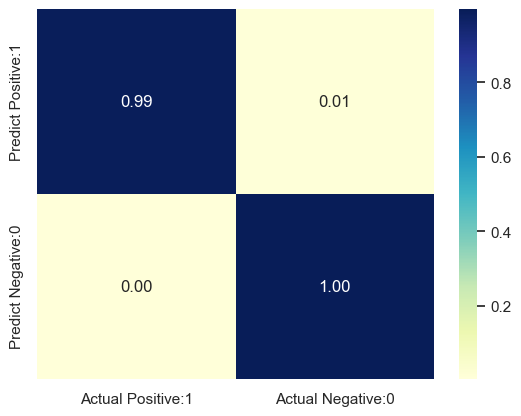

In [2706]:
# Normalize the confusion matrix
cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

## 9. Draw your conclusions and observations about the performance of the model relevant to the classes’ distributions. 

## 10. Repeat the previous classification task using three other models of your choice 
#### (example suggestions here https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html on Scikit-Learn website) and report the performance. 


### Random Forest Classifier

In [84]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and train model
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_test_random_forest = random_forest.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_random_forest)))

NameError: name 'X' is not defined

In [2708]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_test_random_forest)

print('Confusion matrix\n\n', cm) 

print ('\n True Positives(TP) = ', cm[0, 0])

print('\n True Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[888   3]
 [  0 503]]

 True Positives(TP) =  888

 True Negatives(TN) =  503

False Positives(FP) =  3

False Negatives(FN) =  0


<Axes: >

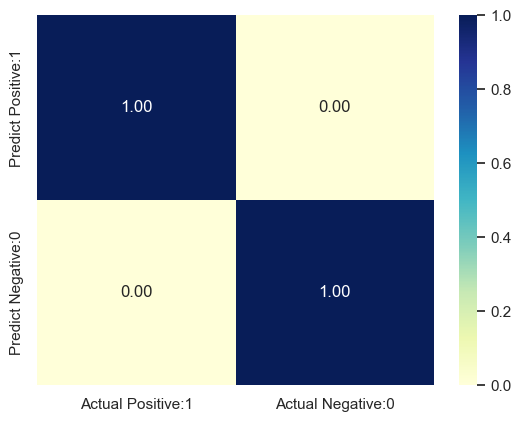

In [2709]:
# Normalize the confusion matrix
cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

### SVM Classifier

In [2710]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and train model
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_test_svc = svm.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_svc)))

Model accuracy score: 1.0000


In [2711]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_test_svc)

print('Confusion matrix\n\n', cm) 

print ('\n True Positives(TP) = ', cm[0, 0])

print('\n True Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[891   0]
 [  0 503]]

 True Positives(TP) =  891

 True Negatives(TN) =  503

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

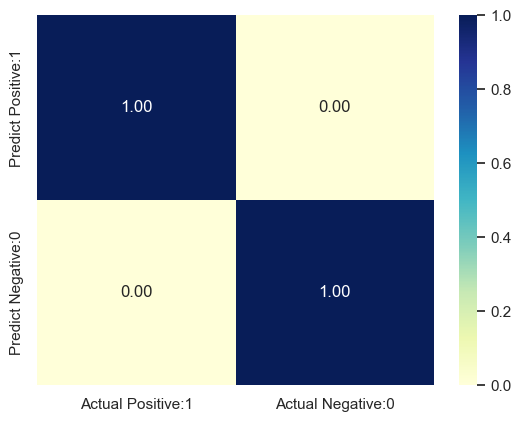

In [2712]:
# Normalize the confusion matrix
cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

### KNN Classifier

In [2713]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and train model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_test_knn = knn.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_knn)))

Model accuracy score: 0.8321


In [2714]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_test_knn)

print('Confusion matrix\n\n', cm) 

print ('\n True Positives(TP) = ', cm[0, 0])

print('\n True Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[780 111]
 [123 380]]

 True Positives(TP) =  780

 True Negatives(TN) =  380

False Positives(FP) =  111

False Negatives(FN) =  123


<Axes: >

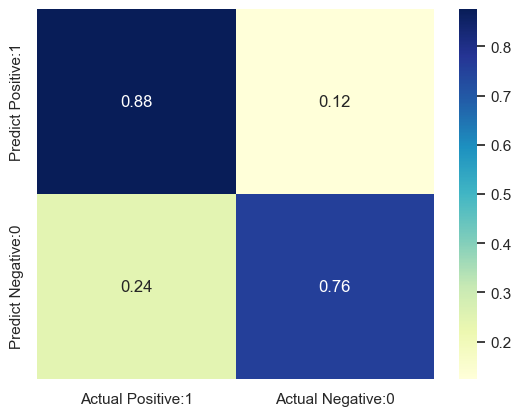

In [2715]:
# Normalize the confusion matrix
cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')